In [2]:
from pymongo import MongoClient

mongo_client = MongoClient()
database = mongo_client["graduation"]
pull_requests_collection = database["pull_requests"]
projects_collection = database["projects"]
commits_collection = database["commits"]
mentions_collection = database["mentions"]

In [19]:
mentions = list(mentions_collection.find({'type': 'ci_mention'}))

project_prs = {}

for mention in mentions:
    project_slug = mention["identifier"].split(".")[0]
    
    if not project_slug in project_prs:
        project_prs[project_slug] = []
        
    number = mention["identifier"].split(".")[1]
    
    if not number in project_prs[project_slug]:
        project_prs[project_slug].append(number)



In [20]:
percentages_of_mentions = []

for slug in project_prs.keys():
    project = projects_collection.find_one({'full_name' : slug, 'status_travis_date' : {'$exists':True}})
    
    if project is None: 
        continue
    
    project_name = slug.split("/")[1]
    project_owner = slug.split("/")[0]
    
    travis_date = project["status_travis_date"]
    
    prs_after = pull_requests_collection.find({'project_name' : project_name, 'project_owner' : project_owner, 'created_at' : {'$gt' : travis_date}}).count()
    
    percentages_of_mentions.append(len(project_prs[slug]) / prs_after * 100)
    
    

/home/nathancassee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: DeprecationWarning: count is deprecated. Use Collection.count_documents instead.
  


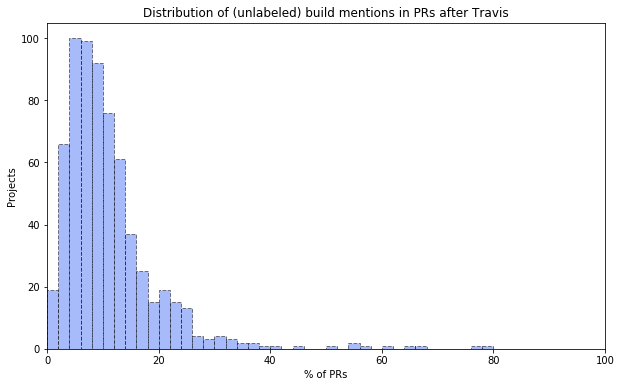

In [22]:
import analysis_utilities
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,6))

plt.hist(percentages_of_mentions, bins = 50, color='#5177f5', alpha=0.5, range=(0,100), ls='dashed', edgecolor='black')

plt.xlim(0, 100)

plt.title("Distribution of (unlabeled) build mentions in PRs after Travis")

plt.xlabel("% of PRs")
plt.ylabel("Projects")

plt.show()